In [29]:
import requests
import json
import time
import os
import numpy as np
import matplotlib.pyplot as plt

In [30]:
url = "https://api.hh.ru"
headers = ""
requests.get(url)
        

<Response [403]>

In [31]:
def getPage(page = 0):
    """
    Создаем метод для получения страницы со списком вакансий.
    Аргументы:
        page - Индекс страницы, начинается с 0. Значение по умолчанию 0, т.е. первая страница
    """
    
    # Справочник для параметров GET-запроса
    params = {
        'text': 'Разработчик', # Текст фильтра. В имени должно быть слово "Аналитик"
        'area': 1, # Поиск ощуществляется по вакансиям города Москва
        'page': page, # Индекс страницы поиска на HH
        'per_page': 100 # Кол-во вакансий на 1 странице
    }
    
    
    req = requests.get('https://api.hh.ru/vacancies', params) # Посылаем запрос к API
    items = req.json()['items'] # Декодируем его ответ, чтобы Кириллица отображалась корректно
    req.close()
    return items

In [32]:
salary = []

for i in range(20):
    items = getPage(i)
    for item in items:
        salary += [item['salary']]

        
salary

[{'from': 30000, 'to': 100000, 'currency': 'RUR', 'gross': False},
 None,
 None,
 {'from': None, 'to': 50000, 'currency': 'RUR', 'gross': False},
 {'from': None, 'to': 420000, 'currency': 'RUR', 'gross': False},
 {'from': 200000, 'to': None, 'currency': 'RUR', 'gross': False},
 {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': True},
 None,
 {'from': 115211, 'to': 115211, 'currency': 'RUR', 'gross': True},
 {'from': 50000, 'to': 100000, 'currency': 'RUR', 'gross': False},
 None,
 {'from': 200000, 'to': 200000, 'currency': 'RUR', 'gross': False},
 None,
 None,
 None,
 {'from': 70000, 'to': 115000, 'currency': 'RUR', 'gross': True},
 {'from': 75000, 'to': None, 'currency': 'RUR', 'gross': False},
 {'from': 300000, 'to': None, 'currency': 'RUR', 'gross': True},
 {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False},
 None,
 {'from': 134114, 'to': None, 'currency': 'RUR', 'gross': True},
 None,
 {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False},
 {'from': 400000

In [62]:
salary
salary_clean = []
for i in range(len(salary)):
    if salary[i] != None:
       #print(0)
        if salary[i]['currency'] == 'RUR':
            coef = 1
        else:
            coef = 50
            
        if salary[i]['gross'] == True:
            gross = 1
        else:
            gross = 0.87
        if (salary[i]['from'] != None) and (salary[i]['to'] != None):
            if np.mean([salary[i]['from'], salary[i]['to']]) * coef * gross  <= 400000:
                salary_clean +=[np.mean([salary[i]['from'], salary[i]['to']]) * coef * gross]
        elif (salary[i]['from'] != None):
            if salary[i]['from'] * coef * gross  <= 400000:
                salary_clean +=[salary[i]['from'] * coef * gross]
        else:
            if salary[i]['to'] * coef * gross  <= 40000:
                salary_clean +=[salary[i]['to'] * coef * gross]
            
            
len(salary_clean)

2453

(array([ 45., 124., 349., 269., 386., 284., 206., 191., 159.,  96.,  72.,
         64.,  48.,  43.,  21.,  48.,   9.,  21.,   9.,   9.]),
 array([  2610. ,  22479.5,  42349. ,  62218.5,  82088. , 101957.5,
        121827. , 141696.5, 161566. , 181435.5, 201305. , 221174.5,
        241044. , 260913.5, 280783. , 300652.5, 320522. , 340391.5,
        360261. , 380130.5, 400000. ]),
 <a list of 20 Patch objects>)

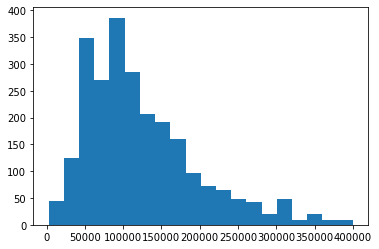

In [63]:
plt.hist(salary_clean, bins = 20)

Второе задание

In [66]:
names = []

for i in range(20):
    items = getPage(i)
    for item in items:
        names += [item['name']]

        
names

['Junior Java разработчик',
 'Frontend разработчик',
 'QA Engineer (manual) стажер',
 'Intern IOS developer',
 'Junior Front-end Developer (React)',
 'Продакт-менеджер',
 'Front-end (React) разработчик',
 'Личный ассистент',
 'QA специалист (Junior)',
 'Младший разработчик C#',
 'Главный бухгалтер',
 'Junior Front-end Разработчик',
 'Стажер-разработчик Python',
 'Junior Java-разработчик',
 'Data Scientist',
 'Директор по информационным технологиям',
 'Fullstack разработчик',
 'Frontend разработчик (удаленно)',
 'Тестировщик ПО (Junior)',
 'Corporate Service Manager',
 'Java разработчик (Junior)',
 'Финансовый директор (CFO)',
 'Junior-программист/Стажер',
 'Главный бухгалтер (производство)',
 'Property Manager',
 'Разработчик Python (junior)',
 'Supply Chain Manager',
 'Руководитель направления по связи с общественностью',
 'Разработчик Python (Junior)',
 'Разработчик Front-end удаленно',
 'IT Стажёр Web-программист',
 'Frontend разработчик (React)',
 'Руководитель юридического отдела'

In [68]:
languages = ['Python', 'C++', 'JS', 'Java', 'PHP']

language_frequency = {}

for name in names:
    for lang in languages:
        if name in lang:
            language_frequency[lang] =  language_frequency[lang] + 1


            
language_frequency           

            

{}